<a href="https://colab.research.google.com/github/letyrodridc/Inteligencia-Artificial-Curso-Inicial/blob/master/material%20docente/Dia%201/resueltos/AI_Aprendizaje_por_Refuerzos_Monte_Carlo_Blackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Artificial Intelligence lessons - by [Leticia Lorena Rodriguez](http://www.letyrodri.com/)

<center>Reinforcement Learning Introduction</center>
<center><h1>Monte Carlo Algorithm</h1></center>

The problems that can be solved by Reinforcement Learning are given as a Markov Decision Process (MDP).

![MDP](http://letyrodri.com/img/cursoAI/mdp4.png)



## Creating an AI that plays Blackjack

The famous card game "Blackjack"[1] can be descriptive as a MDP problem so we can build an artificial intelligence that plays Blackjack winning the most of the matches.

![BlackJack Board](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Blackjack_board.JPG/800px-Blackjack_board.JPG)

[1] [Wikipedia: BlackJack](https://en.wikipedia.org/wiki/Blackjack)


## Activity 1: Understanding the OpenAI environment for the Cliff-Walking problem

OpenAI[2] is a foundation that has the mission to assurance the benefit of AI for the Humanity. Its webpage describe it:

"OpenAI’s mission is to ensure that artificial general intelligence (AGI)—by which we mean highly autonomous systems that outperform humans at most economically valuable work—benefits all of humanity. We will attempt to directly build safe and beneficial AGI, but will also consider our mission fulfilled if our work aids others to achieve this outcome."

It offers a library with different environment to be used for testing and developing AI algorithms. It has an specific environment that simulates Blackjack matches. I will explain it here, in this lab.


#### ¿Which are the rules of OpenAI's Blackjack?

<br>

**Objetive**

Blackjack is an English card games where the goal is with all the hand cards to sum 21 or closer without exceeding it.


<br>

**Players**

The AI (player) is going to play against the dealer.

<br>

**The deck**

The game is implemented over an infinite deck (or with replacement).
 
      🂡	🂢	🂣	🂤	🂥	🂦	🂧	🂨	🂩	🂪	🂫	🂭	🂮	
  
      🂱	🂲	🂳	🂴	🂵	🂶	🂷	🂸	🂹	🂺	🂻	🂽	🂾	
      
      🃁	🃂	🃃	🃄	🃅	🃆	🃇	🃈	🃉	🃊	🃋	🃍	🃎	
  
      🃑	🃒	🃓	🃔	🃕	🃖	🃗	🃘	🃙	🃚	🃛	🃝	🃞
      
      🂠
      


<br>

**Card values**

The Jack, Queen, and King cards have a value of 10.  🃛	🃝	🃞  🂻	🂽	🂾  🃋	🃍	🃎	🃛	🃝	🃞

The Aces can be 11 or 1. When its value is 11, it's called "usable".   🂡 🂱 🃁 🃑

The value of the rest of the card is the printed one. So for example, the card 🃃 has the value of 3.

<br>

**Game dynamic**

The game starts with two pairs of a face-up card and a face-down card. One pair for each, the player and the dealer. 🃒 🂠  The player goes first and turns the face-down card up. The player then can ask for an additional card  (sigue=hit=1) until he/she decides to stop (se planta=stick=0). If the sum exceeds 21, bust. After the player stick, the dealer revels his/her face-down card and grab a new card until the sum is 17 or more. If the dealer bust, the player wins. If the player and the dealer don't bust, the result (win lose draw) will depend on the one that got closer to 21.  

<br>

**Return**

The return for the player in case of winning is +1, 0 if there is a tie, and -1 if he/she lose.

<br>

**State Space**

The state (observation) is a triplet of: the card sum of the player, if the dealer is showing an As, and if the player has an usuable as (0 or 1).

<br>
This environment corresponds to the version described in the 5.1 example of the book: "Reinforcement Learning: An introduction" by Sutton and Barto.

<br>
Public draft here: http://incompleteideas.net/book/the-book-2nd.html

#### Imports the necessary packages

In [1]:
!pip install gym
import gym       # Librería OpenAI 
import random
from collections import deque
import numpy as np

# Refresco automático de la notebook (para jupyter notebooks)
%load_ext autoreload
%autoreload 2

#### Iniciamos el entorno del Blackjack

In [2]:
env = gym.make('Blackjack-v0')
env.seed(0) # El entorno precisa definir una semilla para la aleatoriedad


[0]

#### Observamos los elementos del entorno, es particular las acciones y los estados posibles

In [3]:
action_space = env.action_space              # Obtenemos la cantidad de elementos del espacio de acciones (action space)
observation_space = env.observation_space    # Obtenemos la cantidad de elementos del espacio de estados (state space)

## Obtengo la cantidad de acciones en un entero tipo int
actions_len = action_space.n

print("Acciones: ", action_space)
print("Estados: ", observation_space)

Acciones:  Discrete(2)
Estados:  Tuple(Discrete(32), Discrete(11), Discrete(2))


Una vez que hemos iniciado el entorno podemos simular una partida de Blackjack.

Una partida en MDP va a ser un episodio, es decir, una secuencia de 

In [4]:
action_name = ["SE PLANTA","SIGUE"]
play_games = 10 # Varie la cantidad de juegos 

rewards = list()

for g in range(0, play_games):
    print("Juego ... ",g+1)
    
    # Arranca de nuevo, resetea el entorno
    initial_state = env.reset()
    
    print("Estado al Inicio:", initial_state)
   
    while(True):
        # Muestra el entorno, lo dibuja - en BlackJack no hay entrono visual
        #env.render()
        print("Jugador: ",env.player)
        print("Dealer: ",env.dealer)
        # Elije una acción
        action = action_space.sample()
        
        print(action_name[action])

        # Toma una acción
        next_state, reward, done, _ = env.step(action)
        
        print("Estado Actual:", next_state)
        
        
        if done:
            rewards.append(reward)
            print("Jugador: ",env.player)
            print("Dealer: ",env.dealer)
            print("Recompensa:", reward)
            
            break

  

print("\nGanados: ",np.sum([t for t in rewards if t > 0])/play_games*100,"%\n")
print("\nEmpatados: ",np.sum([t for t in rewards if t == 0])/play_games*100,"%\n")
print("\nPerdidos: ",np.sum([t*-1 for t in rewards if t < 0])/play_games*100,"%\n")
    
    

Juego ...  1
Estado al Inicio: (18, 1, False)
Jugador:  [10, 8]
Dealer:  [1, 7]
SE PLANTA
Estado Actual: (18, 1, False)
Jugador:  [10, 8]
Dealer:  [1, 7]
Recompensa: 0.0
Juego ...  2
Estado al Inicio: (14, 10, False)
Jugador:  [7, 7]
Dealer:  [10, 4]
SIGUE
Estado Actual: (20, 10, False)
Jugador:  [7, 7, 6]
Dealer:  [10, 4]
SIGUE
Estado Actual: (24, 10, False)
Jugador:  [7, 7, 6, 4]
Dealer:  [10, 4]
Recompensa: -1
Juego ...  3
Estado al Inicio: (19, 10, False)
Jugador:  [10, 9]
Dealer:  [10, 10]
SE PLANTA
Estado Actual: (19, 10, False)
Jugador:  [10, 9]
Dealer:  [10, 10]
Recompensa: -1.0
Juego ...  4
Estado al Inicio: (13, 10, True)
Jugador:  [1, 2]
Dealer:  [10, 3]
SIGUE
Estado Actual: (15, 10, True)
Jugador:  [1, 2, 2]
Dealer:  [10, 3]
SIGUE
Estado Actual: (16, 10, True)
Jugador:  [1, 2, 2, 1]
Dealer:  [10, 3]
SIGUE
Estado Actual: (18, 10, True)
Jugador:  [1, 2, 2, 1, 2]
Dealer:  [10, 3]
SIGUE
Estado Actual: (21, 10, True)
Jugador:  [1, 2, 2, 1, 2, 3]
Dealer:  [10, 3]
SIGUE
Estado Act

En el código anterior, elegimos la accion de manera aleatoria (random_policy)

In [0]:
def random_policy():
  return action_space.sample()

## Actividad 2: Generando una secuencia de episodios

Para terminar de comprender el entorno, podemos escribir un método que dado un entorno y eligiendo siempre acciones aleatorias, retorne una lista con los estados, acciones y retornos de un episodio :

<center>
  
$s_0a_1r_1 s_1a_2r_2 s_2a_3r_3.... s_{n-1}a_nr_ns_n$


  
</center>

Donde:
* Acción: $a_i$ $\in$ $A$ y $0 \leq i < n$ 
* Estado: $s_i$ $\in$ $S$ y $0 \leq i < n$
* Recompensa: $r_i$ $\in$ $R$ y $0 \leq i < n$ 
* $n$ es longitud del episodio simulado



In [0]:


def generate_episode(policy):
  episode_list = []
  
  initial_state = env.reset()
  
  state = initial_state
  
  while(True):
        # Elije una acción aleatoria
        action = action_space.sample()
        
        # Toma la acción action
        next_state, reward, done, _ = env.step(action)
        
        ## Agrega la acción, retorno y próximo estado a la lista
        episode_list.append( (state, action, reward) )
       
        
        state = next_state
         
        if done:
            
            break
            
  return episode_list           

  
  

Testeo del método *generate_episode*

In [9]:
episode_list = generate_episode(random_policy)

print(episode_list)

[((19, 3, False), 0, 1.0)]


Recordar que el **estado** (observation), en el caso del Entorno de Blackjack de OpenAI, es una tripleta de: la suma del juegador actual, si el dealer está mostrando un As or si el juegador tiene o no un as usable (0 o 1).

**Acción** con valor 0 significa que SE PLANTA y con valor 1, que SIGUE.

**Retorno** con valor -1 significa PIERDE, con valor 0 EMPATA, y con valor 1 GANA.

## Actividad 3: Implementando una Q-Table

Para implementar una Q-Table precisamos para cada estado tener un arreglo del tamaño de la cantidad de acciones que hay. 

En este caso, vamos a usar un diccionario cuyas claves son los estados y los valores un arreglo de numpy de 2 posiciones. Cada posición del arreglo va a guardar el retorno esperado para cada acción 0: SE PLANTA o 1: SIGUE.

#### Creamos la estructura de datos que va a representar la Q-Table

In [0]:
from collections import defaultdict
from functools import partial

# Se le pasa por parametro la función np.zeros con parámetro 2. 
# Le estamos indicando que cada clave que agregue en el diccionario
# va a crear un vector de dos posiciones de ceros como su valor.
Q = None

def create_Q_Table():
  return defaultdict(partial(np.zeros, 2))
  
Q = create_Q_Table()

#### Podemos por ejemplo, generar un episodio e ir llenando la tabla con los retornos

In [0]:
def add_one_game_to_Q():
  episode_list = generate_episode(random_policy)

  i = 0

  while(i < len(episode_list)):
      state = episode_list[i][0]
      action = episode_list[i][1]
      reward = episode_list[i][2]

      Q[state][action] = Q[state][action]+reward
      i = i+1

add_one_game_to_Q()
print(Q,"\n")

defaultdict(..., {(21, 10, True): array([0., 0.]), (21, 10, False): array([1., 0.])}) 



#### Así quedarían almacenados los datos en la Q-Table

In [0]:
def print_Q(Q):
    
    states = list(Q.keys())
     
    print("Las claves son los estados: ", states)
    
    actions = [str(i) for i in range(len(Q[states[0]]))]
    
    print("---------- Q-Table ------------")
    print("\t\t","\t".join(actions))
    print("-------------------------------")
    
    for s in states:
        values = [Q[s][int(a)] for a in actions]
        print(f"{s}\t|{values[0]:.3f}\t|{values[1]:.3f}")
        
    print("Nota: Los valores estan truncados a tres dígitos para visualización")
                
print_Q(Q)



Las claves son los estados:  [(21, 10, True), (21, 10, False)]
---------- Q-Table ------------
		 0	1
-------------------------------
(21, 10, True)	|0.000	|0.000
(21, 10, False)	|1.000	|0.000
Nota: Los valores estan truncados a tres dígitos para visualización


### Veamos como quedaría la Q-Table después de 10 juegos.

¿Basándose en la tabla que decisiones se podría tomar para ganar?

In [0]:
games = 10 
Q = create_Q_Table()
for i in range(games):
  add_one_game_to_Q()

print_Q(Q)  

Las claves son los estados:  [(18, 1, False), (20, 3, False), (24, 10, False), (7, 10, False), (17, 10, False), (21, 10, False), (15, 9, False), (16, 2, False), (17, 8, False), (15, 10, False), (17, 4, False), (20, 10, False), (28, 10, False), (14, 3, False), (23, 2, False), (16, 10, True), (19, 10, False), (21, 5, False), (24, 5, False), (15, 5, False), (19, 4, False), (29, 8, False), (20, 8, False), (18, 10, False), (13, 5, False), (25, 10, False), (12, 2, False), (17, 2, False), (22, 10, False), (16, 3, True), (14, 7, False), (12, 10, False), (28, 8, False), (19, 4, True), (28, 4, False), (21, 3, True), (15, 3, False), (12, 3, False), (17, 5, False), (7, 9, False), (22, 8, False), (17, 10, True), (10, 10, False), (18, 6, False), (24, 9, False), (13, 10, False), (14, 8, True), (13, 7, False), (21, 9, True), (14, 2, False), (21, 1, True), (16, 3, False), (21, 7, False), (19, 10, True), (14, 5, False), (16, 1, True), (26, 10, False), (19, 3, False), (28, 3, False), (13, 6, False), (9, 

## Actividad 4: Implementando una AI para ganar al BlackJack lo más posible

Vamos a escribir una AI que utlizando Aprendizaje por Refuerzos va a aprender que decisiones tomar según la mano, para ganar al BlackJack lo más posible.



#### Vamos a usar la política e-greedy para este ejercicio

In [0]:
def e_greedy(epsilon=0.5):
    
    # Si el estado está en la Q-table -> Puede usar el Q-table
    if state in Q:
        
        # Busca la acción con el mayor valor en la Q-table
        target_action = np.argmax(Q[state])
        
        # Va a elegir mayor probabilidad la target_action
        # Y el resto, va a ser equiprobable epsilon/actions_len 
        p = [0.0 for i in range(actions_len)]

        # Contruye p, las distintas probabilidad para cada acción
        for action in range(actions_len):
            if action == target_action:
                p[action] = 1.0-epsilon+(epsilon/actions_len)
            else:
                p[action] = (epsilon/actions_len)

        # Choice recibe la probabilidad de cada acción            
        return np.random.choice(actions_len, p=p)
    else:
        # El estado no esta en la Q-table
        # Elige en forma aleatoria 1/actions_len
        return np.random.choice(actions_len)

#### Algoritmo de Monte Carlo

![Monte Carlo](http://letyrodri.com/img/cursoAI/montecarlo.png)


In [0]:
def monte_carlo_learning(env, episodes = 1000, debug=False):
    '''
    Genera la función state-value
    '''
    
    # Inicializamos la tabla vacía
    Q = defaultdict(partial(np.zeros, actions_len))
    
    # Creamos dos variables para ir guardando la suma de los retornos 
    # y la cantidad (a fin de calcular el promedio)
    returns = defaultdict(partial(np.zeros, actions_len))
    returns_totals = defaultdict(partial(np.zeros, actions_len))
    
    # Va a iterar una serie de episodios
    for e in range(episodes):
      
        # Genera el episodio completo y devuelve la historia 
        # (estado, accion, retorno, estado, accion, retorno...)
        
        episode_history = generate_episode(e_greedy)
        
        # Completa las variables temporales con los retornos acumulados y 
        # la cantidad de retornos
        for (state, action, reward) in episode_history:
            returns[state][action] = returns[state][action]+reward
            returns_totals[state][action] = returns_totals[state][action]+1
        
        # Calcula el promedio y actualiza la Q-Table
        for (state, action, reward) in episode_history:
            Q[state][action] = returns[state][action] / returns_totals[state][action]

            if debug:
                print(f"Actualiza Q-Table: Q({state},{action}) = ",Q[state][action],"\n") 


            if done:
                break
    
    return Q


#### Hacemos que se ejecute el algoritmo para que aprenda y se complete la Q-Table

In [0]:
episodes = 100 

Q = monte_carlo_learning(env,  episodes,  debug=True)



#### Miremos la Q-Table aprendida

In [0]:
print_Q(Q) 

Las claves son los estados:  [(14, 9, False), (11, 8, False), (11, 10, False), (20, 9, True), (18, 4, False), (20, 8, False), (14, 10, False), (12, 4, False), (20, 10, False), (15, 3, False), (20, 9, False), (10, 5, False), (21, 3, True), (17, 3, False), (18, 10, False), (12, 8, False), (14, 4, False), (21, 8, True), (17, 10, True), (12, 10, False), (13, 4, False), (17, 7, False), (16, 7, False), (15, 4, False), (19, 4, False), (17, 9, False), (15, 10, True), (17, 5, False), (13, 7, False), (12, 2, False), (18, 2, False), (19, 8, False), (15, 10, False), (9, 6, False), (17, 10, False), (12, 7, False), (16, 10, False), (13, 3, False), (7, 5, False), (21, 10, True), (12, 10, True), (4, 9, False), (14, 4, True), (13, 1, True), (13, 10, False), (18, 6, False), (13, 5, False), (18, 3, False), (16, 5, True), (10, 7, False), (18, 10, True), (14, 6, False), (18, 8, True), (14, 1, False), (14, 8, True), (20, 6, False), (15, 1, False), (16, 2, True), (19, 5, False), (12, 5, False), (19, 10, Fals

#### Testeamos los aprendido jugando un par de partidas

In [0]:
# Arranca de nuevo, resetea el entorno
state = env.reset()
    
print("Estado al Inicio:", state)

withUsableAs = "con As usable" if state[2] else "sin As usable"
print(f"Jugador sacó: {state[0]} {withUsableAs}, Dealer sacó: {state[1]} ")
   

while(True):
    
  
    # Elije una acción, la de máximo retorno estimado en la Q-table ~ 1 linea
    action = np.argmax(Q[state])
        
    # Toma una acción
    next_state, reward, done, _ = env.step(action)
    
    print(f"Elije la acción: {action} - {action_name[action]}")
        
    state = next_state
    
    if action:
      withUsableAs = "con As usable" if state[2] else "sin As usable"
      print(f"Jugador sacó: {state[0]} {withUsableAs}")
    
    if done:
        result = "GANO" if reward > 0 else ("PERDIÓ" if reward == 0 else "EMPATÓ")
        print("Terminó el juego.")
        print(f"El jugador {result}")
        break


Estado al Inicio: (13, 7, True)
Jugador sacó: 13 con As usable, Dealer sacó: 7 
Elije la acción: 1 - SIGUE
Jugador sacó: 13 sin As usable
Elije la acción: 1 - SIGUE
Jugador sacó: 18 sin As usable
Elije la acción: 0 - SE PLANTA
Terminó el juego.
El jugador GANO


 #### Vemos que tan bueno es el algoritmo

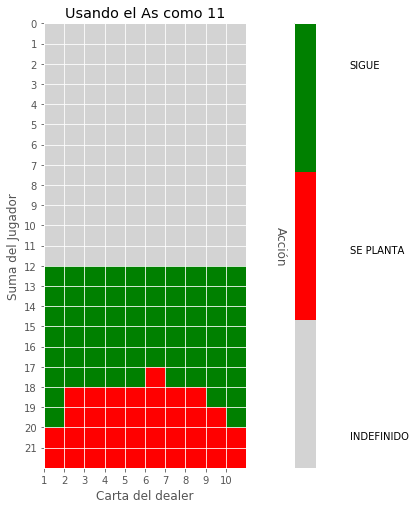

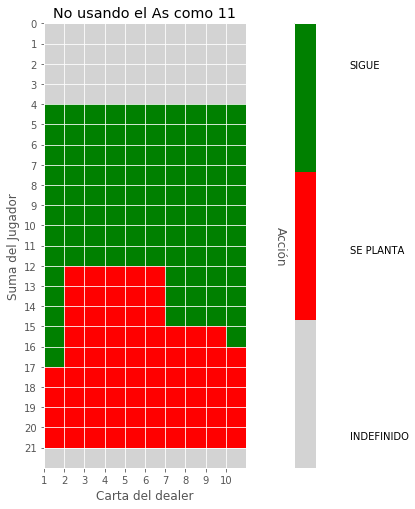

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

def _get_policy_array(Q, usable_ace):
    
    data = np.zeros( (22,10) )
            
    for q in Q:

        target_action = np.argmax(Q[q])

        if q[0] in range(1,22) and q[2] == usable_ace:
            data[q[0]][q[1]-1] = target_action+1
        
    return data

def _plot_policy_array(policy_arr, title):
    cMap = ListedColormap(['lightgray',  'red', 'green'])
    fig, ax = plt.subplots(figsize=(7, 7))
    im = ax.imshow(policy_arr,  cmap=cMap)
    plt.style.use('ggplot')
    
    ax.set_xticks(np.arange(10)-0.5)
    ax.set_yticks(np.arange(22)-0.5)
    
    ax.set_xticklabels(np.arange(10)+1)
    ax.set_yticklabels(np.arange(22))
    ax.set_xlabel("Carta del dealer")
    ax.set_ylabel("Suma del Jugador")
    
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    fig.tight_layout()
    plt.title(title)
    
    cbar = plt.colorbar(im,pad=0.1)
    cbar.ax.get_yaxis().set_ticks([])
    for j, lab in enumerate(['INDEFINIDO','SE PLANTA','SIGUE']):
        cbar.ax.text(5, (5 * j + 1) / 6.0, lab, ha='left', va='top')
    cbar.ax.get_yaxis().labelpad = -30
    cbar.ax.set_ylabel('Acción', rotation=270)


    plt.show()
    
    

def Q_plot(Q, usable_ace):
    title = "Usando el As como 11" if usable_ace else "No usando el As como 11"
    policy_arr = _get_policy_array(Q,usable_ace)
    _plot_policy_array(policy_arr, title)  
    
%matplotlib inline
        
Q_plot(Q,True)

Q_plot(Q,False)